# Stable Diffusion

In [1]:
import model_loader
import pipeline
from PIL import Image
from transformers import CLIPTokenizer
import torch

/home/rob/Documents/Github/stable-diffusion/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
DEVICE = 'cpu'
ALLOW_CUDA = False
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = 'cuda'
elif (torch.backends.mps.is_built() or torch.backends.mps.is_available()) and ALLOW_MPS:
    DEVICE = 'mps'
print(f'Using device: {DEVICE}')

Using device: cpu


In [3]:
tokenizer = CLIPTokenizer("../data/vocab.json", merges_file="../data/merges.txt")
model_file = "../data/v1-5-pruned-emaonly.ckpt"

In [4]:
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

## Text to Image

In [5]:
prompt = 'A cat stretching on the floor, highly detailed, ultra sharp, cinematic, 8k resolution'
uncond_prompt = '' # negative prompt

In [6]:
do_cfg = True # classifier-free guidance
cfg_scale =  7

## Image to Image

In [7]:
input_image = None
image_path = '../data/dog.jpg'
#input_image = Image.open(image_path)
strength = 0.9

In [8]:
sampler = 'ddpm'
num_inference_steps = 50
seed = 42

In [9]:
output_image = pipeline.generate(
    prompt=prompt, 
    uncond_prompt=uncond_prompt,
    input_image=input_image, 
    strength=strength, 
    do_cfg=do_cfg, 
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models, 
    device=DEVICE,
    idle_device='cpu',
    tokenizer=tokenizer
)

100%|██████████| 50/50 [05:02<00:00,  6.05s/it]


In [10]:
output_image

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

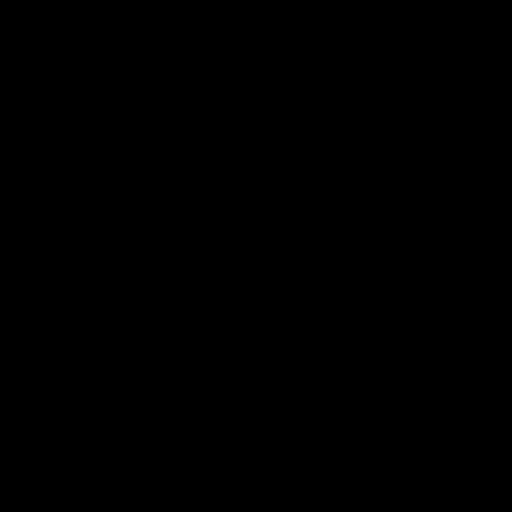

In [11]:
Image.fromarray(output_image)